# pytorch深度网络垃圾分类

* 查看数据，分类，分布等
* 构建四分类的数据集
* 查看构建好的四分类数据集，防止出现问题
* 构建四十分类的数据集
* 查看图片数据，获取图片处理的基本信息

## 数据预处理

In [2]:
## 导库

## 文件操作
import os
import shutil
import codecs
from os import walk
from glob import glob

## 统计库
from collections import Counter

## 随机库
import random


## 可视化
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts import  options as opts
from pyecharts.charts import Bar



# 导入计算库
import numpy as np


## 图片操作
from PIL import Image

### 做四十分类的标签查询

In [3]:
## 做四十分类处理

garbage_classify_rule = {
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}

garbage_classify_index = {"0": "其他垃圾", "1": "厨余垃圾", "2": "可回收物", "3": "有害垃圾"}
garbage_index_classify = {"其他垃圾":"0","厨余垃圾":"1", "可回收物":"2","有害垃圾":"3"}

data_list = []
rank1_garbage_classify_rule = {}
for k,v in garbage_classify_rule.items():
    rank1_k = v.split('/')[0] 
    rank1_v = k
    data_list.append([rank1_k,int(garbage_index_classify[rank1_k]),int(rank1_v)])

rank_k_v_dict = {}

for data in data_list:
    k = data[2] # 原标签
    v = data[1]# 新标签
    rank_k_v_dict[k]=v
    
## 获取到的字典，前者为垃圾小类标签，后者为垃圾大类标签
print(rank_k_v_dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 3, 38: 3, 39: 3}


### 查询文件信息

In [4]:
## 将文件添加至同目录下
base_path = './data/'
data_path = os.path.join(base_path,'garbage_classify/train_data')

for (dirpath, dirnames, filenames) in walk(data_path):
    if len(filenames)>0:
        print('*'*60)
        print("Directory path: ", dirpath)
        print("total examples: ", len(filenames))
        print("File name Example: ", filenames[:5])

************************************************************
Directory path:  ./data/garbage_classify/train_data
total examples:  29604
File name Example:  ['img_1.jpg', 'img_1.txt', 'img_10.jpg', 'img_10.txt', 'img_100.jpg']


### 获取对应路径加标签的信息

In [5]:
## 获得图片路径加对应的标签信息。

def get_img_info():

    ## 获取文件名。
    data_path_txt=os.path.join(data_path,"*.txt")
    ## 利用glob去匹配 获取所有的txt。
    txt_file_list=glob(data_path_txt)
    ## 储存创建的新的txt文本，做标签文件，这里文件不存在可以自动创建因此不用担心。
    img_txt_file="img.txt"
    img_path_list=[]

    for txt_file in txt_file_list:
        with open(txt_file,"r") as f:
            line=f.readline().strip().split(",")
        img_name=line[0]
        label=int(line[1])
        img_name_path=os.path.join(base_path,'garbage_classify/train_data/{}'.format(img_name))
        img_path_list.append({"img_name_path":img_name_path,"label":label})

    return img_path_list


In [6]:
img_path_list=get_img_info()

* 检查数据

In [7]:
img_path_list[:5]

[{'img_name_path': './data/garbage_classify/train_data/img_1.jpg', 'label': 0},
 {'img_name_path': './data/garbage_classify/train_data/img_10.jpg',
  'label': 0},
 {'img_name_path': './data/garbage_classify/train_data/img_100.jpg',
  'label': 0},
 {'img_name_path': './data/garbage_classify/train_data/img_1000.jpg',
  'label': 2},
 {'img_name_path': './data/garbage_classify/train_data/img_10000.jpg',
  'label': 21}]

### 修改为一级分类

In [8]:
## 进行修改为一级分类的标签
img_path_list = []
img_label_dict={}
for img_info in get_img_info():
    img_label = img_info['label']# 修正前的标签
    img_label = rank_k_v_dict[img_label]
    img_info.update({'label':img_label}) # 修正后的标签
    
     # 图片路径＋标签
    img_path_list.append(img_info)

    # 统计每个标签出现次数
    img_label = int(img_label)
    img_label_count = img_label_dict.get(img_label,0)
    if img_label_count:
        img_label_dict[img_label] = img_label_count + 1
    else:
        img_label_dict[img_label] = 1


print('img_path_list = ',img_path_list[:3])
print('img_label_dict = ',img_label_dict)

img_path_list =  [{'img_name_path': './data/garbage_classify/train_data/img_1.jpg', 'label': 0}, {'img_name_path': './data/garbage_classify/train_data/img_10.jpg', 'label': 0}, {'img_name_path': './data/garbage_classify/train_data/img_100.jpg', 'label': 0}]
img_label_dict =  {0: 1652, 2: 8611, 3: 1150, 1: 3389}


### 查看数据

In [9]:
img_label_dict = dict(sorted(img_label_dict.items()))
print(img_label_dict)
print(garbage_classify_index)
print([garbage_classify_index[str(k)] for k in img_label_dict.keys()])
print(list(img_label_dict.values()))

{0: 1652, 1: 3389, 2: 8611, 3: 1150}
{'0': '其他垃圾', '1': '厨余垃圾', '2': '可回收物', '3': '有害垃圾'}
['其他垃圾', '厨余垃圾', '可回收物', '有害垃圾']
[1652, 3389, 8611, 1150]


### 可视化查看

In [10]:


# 构建满足pyecharts 格式数据
x = [garbage_classify_index[str(k)] for k in img_label_dict.keys()]
y = list(img_label_dict.values())

# 创建Bar 示例对象，同时x，y轴数据填充
bar = Bar()

bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='',y_axis=y)

# 设置全局参数
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='垃圾分类 4类垃圾数量统计'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=15))
)

# 展示图表
bar.render()
bar.render_notebook()

## 构建四分类数据集

### 获取总数据量

In [11]:
len(img_path_list)

14802

### 对数据进行8/2分

In [12]:

## 打乱数据。
random.shuffle(img_path_list)

## 获取数量。
img_count=len(img_path_list)
train_img_list=img_path_list[:int(img_count*0.8)]
val_img_list=img_path_list[int(img_count*0.8):]

## 查看数量。
print('train_size=',len(train_img_list))
print('valid_size=',len(val_img_list))


train_size= 11841
valid_size= 2961


### 生成训练集
* 检测路径是否有效
* 生成训练集
* 生成测试集

In [13]:
## 检测路径是否存在，不存在则创建一个路径。

## 该路径用于四分类训练。
train_path=os.path.join(base_path,'4_garbage-classify-for-pytorch')
if os.path.exists(train_path) is not True:
    os.mkdir(train_path)
    
with open(os.path.join(base_path,'4_garbage-classify-for-pytorch/train.txt'),'w') as f:
    for img_dict in train_img_list:
        img_name_path =img_dict['img_name_path'] # ../data/garbage_classify/img_11674.jpg
        img_label=img_dict['label']
        f.write("{}\t{}\n".format(img_name_path,img_label))
        # 图片-标签目录
        garbage_classify_dir=os.path.join(base_path,'4_garbage-classify-for-pytorch/train/{}'.format(img_label))
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
        # 拷贝数据到目录下
        shutil.copy(img_name_path,garbage_classify_dir)
        
with open(os.path.join(base_path,'4_garbage-classify-for-pytorch/val.txt'),'w') as f:
    for img_dict in val_img_list:
        #文本格式数据
        img_name_path = img_dict['img_name_path'] # ../data/garbage_classify/img_11674.jpg
        img_label = img_dict['label']
        f.write("{}\t{}\n".format(img_name_path,img_label))
        # 图片-标签目录
        garbage_classify_dir = os.path.join(base_path,'4_garbage-classify-for-pytorch/val/{}'.format(img_label))
        #print(garbage_classify_dir)
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
        # 拷贝数据到目录下
        #print(garbage_classify_dir,img_name_path)
        shutil.copy(img_name_path,garbage_classify_dir)

### 查看训练集和测试集的数据

In [14]:
## 获取路径。
train_path=os.path.join(base_path,'4_garbage-classify-for-pytorch/train.txt')
test_path=os.path.join(base_path,'4_garbage-classify-for-pytorch/val.txt')


def get_label_idx_list(data_path):
    label_idx_list = []

    for line in codecs.open(data_path,'r'):
        line = line.strip()
        label_idx = line.split('\t')[1]
        label_idx_list.append(int(label_idx))
    return label_idx_list

train_dict = dict(Counter(get_label_idx_list(train_path)))
test_dict = dict(Counter(get_label_idx_list(test_path)))

train_dict = dict(sorted(train_dict.items()))
test_dict = dict(sorted(test_dict.items()))

print('garbage_classify_index = ',garbage_classify_index)
print("train_dict = ",train_dict)
print("test_dict = ",test_dict)


garbage_classify_index =  {'0': '其他垃圾', '1': '厨余垃圾', '2': '可回收物', '3': '有害垃圾'}
train_dict =  {0: 1324, 1: 2716, 2: 6901, 3: 900}
test_dict =  {0: 328, 1: 673, 2: 1710, 3: 250}


### 可视化查看

In [15]:
# 创建Bar 示例对象，同时x，y轴数据填充
bar = Bar(init_opts=opts.InitOpts())

assert len(train_dict.keys())==len(test_dict.keys())
x = [ "{}-{}".format(label_idx, garbage_classify_index.get(str(label_idx),""))  
     for label_idx in img_label_dict.keys()]

bar.add_xaxis(xaxis_data=list(x))
bar.add_yaxis(series_name='Train',y_axis=list(train_dict.values()))
bar.add_yaxis(series_name='Val',y_axis=list(test_dict.values()))

# 设置全局参数
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='垃圾分类 不同类别数据数量统计'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=15))
)

# 展示图表
save_png_path="4分类训练_测试数据可视化分布.html"

## 这里用读写方法直接创建一个文件，防止不存在。
file=open(save_png_path,"w")
file.close()

bar.render(path=save_png_path)
bar.render_notebook()

## 构建四十分类数据集

### 获取对应的图片及标签

In [16]:
def get_image_info():
    
    data_path_txt = os.path.join(data_path,'*.txt') # 所有*.txt 文件
    txt_file_list = glob(data_path_txt)
    
    #print(txt_file_list[:2])
    
    
    # 存储txt 文件变量 
    img_path_list = []
    img_name2label_dict = {}
    
    img_label_dict = {} 
    #读取我们文件的内容
    for file_path in txt_file_list:
        
        # 读取文件内容
        with open(file_path,'r') as f:
            line = f.readline()
            
        #print(line)
        line = line.strip()
        img_name = line.split(',')[0]
        img_label = line.split(',')[1]
        img_label = int(img_label) 
        # 文件路径  ../data/garbage_classify/train_data/img_10.jpg
        img_name_path = os.path.join(base_path,'garbage_classify/train_data/{}'.format(img_name))
        
        img_path_list.append({'img_name_path':img_name_path,'img_label':img_label})
        
        
        # 图片名称－标签
        img_name2label_dict[img_name] = img_label
        
        # 统计每个标签出现的次数<img_label,img_count>
        img_label_count = img_label_dict.get(img_label,0)
        if img_label_count:
            img_label_dict[img_label] = img_label_count + 1
        else:
            img_label_dict[img_label] =1 
            
    
    # 最终返还的结果
    return img_path_list,img_label_dict,img_name2label_dict

### 查看分配好的数据的列表

In [17]:
img_path_list,img_label_dict,img_name2label_dict = get_image_info()
print('img_path_list = ',img_path_list[:3])
print('img_label_dict = ',img_label_dict)
print('img_label_dict len = ',len(img_label_dict))

img_path_list =  [{'img_name_path': './data/garbage_classify/train_data/img_1.jpg', 'img_label': 0}, {'img_name_path': './data/garbage_classify/train_data/img_10.jpg', 'img_label': 0}, {'img_name_path': './data/garbage_classify/train_data/img_100.jpg', 'img_label': 0}]
img_label_dict =  {0: 242, 2: 279, 21: 657, 22: 375, 23: 309, 24: 318, 3: 85, 25: 550, 26: 351, 4: 387, 27: 536, 28: 382, 29: 416, 30: 321, 31: 446, 32: 280, 33: 322, 34: 395, 35: 351, 36: 265, 5: 289, 37: 322, 38: 391, 39: 437, 6: 395, 7: 362, 8: 380, 1: 370, 9: 389, 10: 387, 11: 736, 12: 331, 13: 409, 14: 357, 15: 419, 16: 352, 17: 309, 18: 362, 19: 312, 20: 226}
img_label_dict len =  40


In [18]:
# 默认情况key 进行排序
img_label_dict = dict(sorted(img_label_dict.items()))

In [19]:
label_dict=garbage_classify_rule

### 获取四十分类列表

In [20]:
# 首先，构建数据
x = img_label_dict.keys()
y = img_label_dict.values()
print('x = ',x)
print('y = ',y)

# 借助python 中列表推导方法
x = ["{}-{}".format(label_idx,label_dict[str(label_idx)] )
     for label_idx in img_label_dict.keys()]

print('x = ',x)

x =  dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
y =  dict_values([242, 370, 279, 85, 387, 289, 395, 362, 380, 389, 387, 736, 331, 409, 357, 419, 352, 309, 362, 312, 226, 657, 375, 309, 318, 550, 351, 536, 382, 416, 321, 446, 280, 322, 395, 351, 265, 322, 391, 437])
x =  ['0-其他垃圾/一次性快餐盒', '1-其他垃圾/污损塑料', '2-其他垃圾/烟蒂', '3-其他垃圾/牙签', '4-其他垃圾/破碎花盆及碟碗', '5-其他垃圾/竹筷', '6-厨余垃圾/剩饭剩菜', '7-厨余垃圾/大骨头', '8-厨余垃圾/水果果皮', '9-厨余垃圾/水果果肉', '10-厨余垃圾/茶叶渣', '11-厨余垃圾/菜叶菜根', '12-厨余垃圾/蛋壳', '13-厨余垃圾/鱼骨', '14-可回收物/充电宝', '15-可回收物/包', '16-可回收物/化妆品瓶', '17-可回收物/塑料玩具', '18-可回收物/塑料碗盆', '19-可回收物/塑料衣架', '20-可回收物/快递纸袋', '21-可回收物/插头电线', '22-可回收物/旧衣服', '23-可回收物/易拉罐', '24-可回收物/枕头', '25-可回收物/毛绒玩具', '26-可回收物/洗发水瓶', '27-可回收物/玻璃杯', '28-可回收物/皮鞋', '29-可回收物/砧板', '30-可回收物/纸板箱', '31-可回收物/调料瓶', '32-可回收物/酒瓶', '33-可回收物/金属食品罐', '34-可回收物/锅', '35-可回收物/食用油桶', '36-可回收物/饮料瓶', '37-有害垃圾/干电池', '38-有害垃圾/软膏', '39-有害垃圾/过期药物']


### 可视化观察

In [21]:
## 构建pyecharts 需要的数据
x = list(x)
y = list(y)

## 创建pyechats 的Bar 示例对象
bar = Bar(init_opts=opts.InitOpts(width='1100px',height='500px'))

## 填充数据
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='',y_axis=y)

bar.set_global_opts(
        # 给我们的表增加一个标题
        title_opts=opts.TitleOpts(title='垃圾分类 不同类别数据分布'),
        # 使得我们的x 轴数据倾斜
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate = 15) ) 
    )
## 展示我们的图表
file_40_path="40分类数据分布查看.html"

file=open(file_40_path,"w")
file.close()

bar.render(file_40_path)
bar.render_notebook()

In [22]:
### 查看

In [23]:


# 获取一张图片
base_path = './data/'
data_path = os.path.join(base_path,'garbage_classify/train_data')
pic_file_name = os.path.join(data_path,'img_1.jpg')
print('pic_file_name = ',pic_file_name)

# 获取长度和高度
img = Image.open(pic_file_name)
print('img.size = ',img.size)

pic_file_name =  ./data/garbage_classify/train_data\img_1.jpg
img.size =  (800, 575)


### 统计所有图片获取比例信息

In [24]:
data_path_jpg = os.path.join(data_path,'*.jpg')


data_path_list = glob(data_path_jpg)
data_list = []

for file_path in data_path_list:
    img = Image.open(file_path)
    width = img.size[0]
    height = img.size[1]
    
    ratio = float("{:.2f}".format(width/height))
    
    img_name = file_path.split('\\')[-1]
    img_id = img_name.split('.')[0].split('_')[1]
    img_label = img_name2label_dict.get(img_name,0)
    data_list.append([int(img_id),width,height,ratio,int(img_label)])

    
## 获取到的列表元素为 id 宽度 高度 比例 标签
data_list[:3]

[[1, 800, 575, 1.39, 0], [10, 750, 690, 1.09, 0], [100, 688, 357, 1.93, 0]]

### 获取所有比例数据

In [25]:
ratio_list = [ratio[3] for ratio in data_list]
print(ratio_list[:5])

[1.39, 1.09, 1.93, 0.99, 1.11]


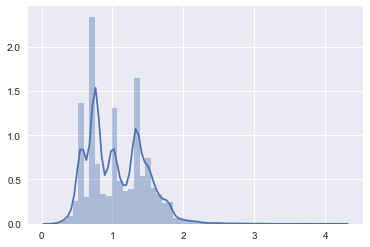

In [26]:
sns.set()
np.random.seed(0)

# seaborn 直方图展示
ax = sns.distplot(ratio_list) # 告诉我么数据分布（0，2）

plt.show()

### 利用filter过滤数据

14192


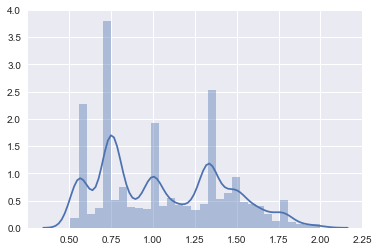

In [27]:
ratio_list = list(filter(lambda x:x>0.5 and x<=2,ratio_list))
print(len(ratio_list))
sns.set()
np.random.seed(0)

# seaborn 直方图展示
ax = sns.distplot(ratio_list) # 告诉我么数据分布（0，2）

plt.show()

In [28]:
# 原始数据大小
len(img_path_list)

14802

### 切分四十分类的数据集

In [29]:
# 原始数据进行shuffle
import random 
random.shuffle(img_path_list)

# 数据分布分布 0.8 0.2
img_count = len(img_path_list)
train_size = int(img_count*0.8)

print('img_count = ',img_count)
print('train_size = ',train_size)
train_img_list = img_path_list[:train_size]
val_img_list = img_path_list[train_size:]

print('train_img_list size = ',len(train_img_list))
print('val_img_list size = ',len(val_img_list))

img_count =  14802
train_size =  11841
train_img_list size =  11841
val_img_list size =  2961


### 生成数据集
* 检测路径是否有效
* 生成训练集
* 生成测试集

In [33]:
## 该路径用于四十分类训练。
train_path=os.path.join(base_path,'40_garbage-classify-for-pytorch')
if os.path.exists(train_path) is not True:
    os.mkdir(train_path)


with open(os.path.join(base_path,'40_garbage-classify-for-pytorch/train.txt'),'w') as f:
    for img_dict in train_img_list:
        
        # 文本格式数据
        img_name_path = img_dict['img_name_path']#'../data/garbage_classify/train_data/img_1.jpg'
        img_label = img_dict['img_label']
        
        f.write("{}\t{}\n".format(img_name_path,img_label))
        
        # 图片－标签目录
        garbage_classify_dir = os.path.join(base_path,'40_garbage-classify-for-pytorch/train/{}'.format(img_label))
        
        ## 目录创建
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
        
        ## 图片数据进行拷贝
        shutil.copy(img_name_path,garbage_classify_dir)

# 验证数据的生成
with open(os.path.join(base_path,'40_garbage-classify-for-pytorch/val.txt'),'w') as f:
    for img_dict in val_img_list:
        
        # 文本格式数据
        img_name_path = img_dict['img_name_path']#'../data/garbage_classify/train_data/img_1.jpg'
        img_label = img_dict['img_label']
        
        f.write("{}\t{}\n".format(img_name_path,img_label))
        
        # 图片－标签目录
        garbage_classify_dir = os.path.join(base_path,'40_garbage-classify-for-pytorch/val/{}'.format(img_label))
        
        ## 目录创建
        if not os.path.exists(garbage_classify_dir):
            os.makedirs(garbage_classify_dir)
        
        ## 图片数据进行拷贝
        shutil.copy(img_name_path,garbage_classify_dir)